# Checkpoint



This is your GDA Track 2 halftime checkpoint. Congratulations for making it halfway!

The 3 main exercises are independent. So you can do them in the order you prefer. They are all based on the same dataset.

Try to finish this checkpoint in 4 hours. If you haven't finished everything, that's okay. You can take it again later, you will simply indicate in the comments what you have done a posteriori.
We have given you estimated times. Obviously everyone has their strengths and weaknesses, so move forward at your own pace. **However, if you see that you have exceeded a duration, don't get stuck, go on to the next exercise.** You can come back to what you haven't finished at the end.

There are three bonus questions at the end. These are exercises if you want to go further and explore the dataset a bit deeper.

Please execute the code below.

In [180]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/spotify.zip"
df_music = pd.read_csv(url)
df_music

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.61100,0.389,99373,0.910,0.000000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.24600,0.590,137373,0.737,0.000000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.95200,0.663,170267,0.131,0.000000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.70300,0.240,152427,0.326,0.000000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.95000,0.331,82625,0.225,0.123000,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232720,Soul,Slave,Son Of Slide,2XGLdVl7lGeq8ksM6Al7jT,39,0.00384,0.687,326240,0.714,0.544000,D,0.0845,-10.626,Major,0.0316,115.542,4/4,0.962
232721,Soul,Jr Thomas & The Volcanos,Burning Fire,1qWZdkBl4UVPj9lK6HuuFM,38,0.03290,0.785,282447,0.683,0.000880,E,0.2370,-6.944,Minor,0.0337,113.830,4/4,0.969
232722,Soul,Muddy Waters,(I'm Your) Hoochie Coochie Man,2ziWXUmQLrXTiYjCg2fZ2t,47,0.90100,0.517,166960,0.419,0.000000,D,0.0945,-8.282,Major,0.1480,84.135,4/4,0.813
232723,Soul,R.LUM.R,With My Words,6EFsue2YbIG4Qkq8Zr9Rir,44,0.26200,0.745,222442,0.704,0.000000,A,0.3330,-7.137,Major,0.1460,100.031,4/4,0.489


# Data exploration (approximately 1h30)

## Introduction
Display the first 7 rows of the dataset.

In [2]:
df_music.head(7)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.9100,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.7370,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.1310,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.3260,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.2250,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390
5,Movie,Henri Salvador,Le petit souper aux chandelles,0Mf1jKa8eNAf1a4PwTbizj,0,0.749,0.578,160627,0.0948,0.000,C#,0.1070,-14.970,Major,0.1430,87.479,4/4,0.358
6,Movie,Martin & les fées,"Premières recherches (par Paul Ventimila, Lori...",0NUiKYRd6jt1LKMYGkUdnZ,2,0.344,0.703,212293,0.2700,0.000,C#,0.1050,-12.675,Major,0.9530,82.873,4/4,0.533


Get summary statistics of the dataset and information about all types of columns (i.e. numerical and the others). 

What do the numbers tell you about the feature "popularity"?

In [3]:
df_music.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232725 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_signature    23

**Your answer here:**  
`popularity` is of type `int64` and contains 232725 values.

Please check the presence / absence of missing values in each column and comment your result.

In [4]:
df_music.isna().sum()

genre               0
artist_name         0
track_name          0
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

**Your answer here:**  
There are no missing values in any of the columns.

## Some insights about the artists

*You can use `groupby`, `crosstab` or `pivot_table` to solve these questions.*

Give the number of tracks for each artist. The result should be sorted by descending order for a better readability.



In [15]:
df_music[["artist_name", "track_id"]].groupby(by="artist_name").count().sort_values(by="track_id", ascending=False)

,track_id
artist_name,
Giuseppe Verdi,1394
Giacomo Puccini,1137
Kimbo Children's Music,971
Nobuo Uematsu,825
Richard Wagner,804
...,...
Melanie De Biasio,1
Mel Tillis,1
Mel Levin,1



Give the mean of popularity for each artist. 

The result should be sorted by descending order for a better readability.

In addition, who are the 5 most popular artists?

In [21]:
# Give the mean of popularity for each artist.
# The result should be sorted by descending order for a better readability.
print(df_music[["artist_name", "popularity"]].groupby(by="artist_name").mean().sort_values(by="popularity", ascending=False))

# In addition, who are the 5 most popular artists?
print(df_music[["artist_name", "popularity"]].groupby(by="artist_name").mean().sort_values(by="popularity", ascending=False).head(5))

                      popularity
artist_name                     
Pedro Capó                  87.0
Mario Bautista              85.0
Mau y Ricky                 83.0
Kris Kross Amsterdam        82.0
Ninho                       82.0
...                          ...
Brent Holmes                 0.0
The Wayfarers                0.0
Nursery Rhymes Club          0.0
Renee & Jeremy               0.0
Steve Stevens                0.0

[14564 rows x 1 columns]
                      popularity
artist_name                     
Pedro Capó                  87.0
Mario Bautista              85.0
Mau y Ricky                 83.0
Kris Kross Amsterdam        82.0
Ninho                       82.0


## What about Queen?
Display only the Tracks by "Queen".
How many are there in our dataset?

In [35]:
# Display only the Tracks by "Queen"
print(df_music.loc[df_music["artist_name"]=="Queen"])

# How many are there in our dataset?
print(df_music.loc[df_music["artist_name"]=="Queen", "track_id"].count())

# What is the average popularity of Queen's songs?
print(df_music.loc[df_music["artist_name"]=="Queen", "popularity"].mean())

# What are their 3 most popular songs ?
print(df_music.loc[df_music["artist_name"]=="Queen", ["track_name", "popularity"]].sort_values(by="popularity", ascending=False).head(3))

       genre artist_name  ... time_signature valence
152988  Rock       Queen  ...            3/4  0.2020
153284  Rock       Queen  ...            4/4  0.4540
153622  Rock       Queen  ...            4/4  0.4180
153734  Rock       Queen  ...            4/4  0.7640
154806  Rock       Queen  ...            4/4  0.6450
...      ...         ...  ...            ...     ...
225833  Rock       Queen  ...            4/4  0.3980
225906  Rock       Queen  ...            4/4  0.2530
226106  Rock       Queen  ...            3/4  0.4220
226296  Rock       Queen  ...            3/4  0.0932
226415  Rock       Queen  ...            4/4  0.2910

[97 rows x 18 columns]
97
58.79381443298969
                                 track_name  popularity
166058  Bohemian Rhapsody - Remastered 2011          82
166059       Don't Stop Me Now - Remastered          81
166069   Somebody To Love - Remastered 2011          77


What is the average popularity of Queen's songs?

What are their 3 most popular songs ?

**The average popularity of all the song from the Queen Band is:**  
58.79381443298969

**The 3 most popular songs from queen are:**

Bohemian Rhapsody - Remastered 2011  
Don't Stop Me Now - Remastered  
Somebody To Love - Remastered 2011  

## Transform (apply?)
Create a new column 'nb_words', with the number of words in each title (track names). It's up to you to choose if punctuation is a word or not.

In [40]:
# Your code here:

def word_cnt(string):
  return(len(string.strip().split(" ")))

df_music["nb_words"] = df_music["track_name"].apply(word_cnt)

df_music[["track_name","nb_words"]].head()

,track_name,nb_words
0,C'est beau de faire un Show,6
1,Perdu d'avance (par Gad Elmaleh),5
2,Don't Let Me Be Lonely Tonight,6
3,Dis-moi Monsieur Gordon Cooper,4
4,Ouverture,1


## Pivot table
Let's do a pivot table with `genre` in rows, `mode` in columns and number of songs in values. So there should be two columns: "Major" and "Minor" and as many rows as there are genres. 

Which genre-mode duo contains the most songs?

In [67]:
# Let's do a pivot table with genre in rows, mode in columns and number of songs in values.
df_pivot = pd.pivot_table(df_music, values="track_id", index="genre", columns="mode", aggfunc="count")
print(df_pivot)
print()

# Which genre-mode duo contains the most songs?
print(df_pivot.melt(ignore_index=False).sort_values(by="value", ascending=False).head(1))

mode              Major  Minor
genre                         
A Capella            87     32
Alternative        5877   3386
Anime              5552   3384
Blues              6415   2608
Children's Music   4708    695
Children’s Music   5977   3376
Classical          6162   3094
Comedy             6699   2982
Country            7583   1081
Dance              5203   3498
Electronic         4987   4390
Folk               7279   2020
Hip-Hop            5164   4131
Indie              6570   2973
Jazz               5031   4410
Movie              5926   1880
Opera              6418   1862
Pop                5843   3543
R&B                4723   4269
Rap                5170   4062
Reggae             5072   3699
Reggaeton          4566   4361
Rock               6878   2394
Ska                6580   2294
Soul               5107   3982
Soundtrack         5344   4302
World              6823   2273

          mode  value
genre                
Country  Major   7583


# Dataviz (approximately 1h30)

## Remember, each chart must have :
- beautiful colors
- a title
- readable axis ticks
- a legend

Note: since the dataset is quite big, creating the plots might take a bit of time. 

## Display a correlation heatmap
Color scale has to be **center on 0-value**, in order to distinguish negative and positive values. Please choose a beautiful **diverging palette**, and remember to **display a title**.

Regarding `sns.color_palette()` have a look at:
https://medium.com/@morganjonesartist/color-guide-to-seaborn-palettes-da849406d44f

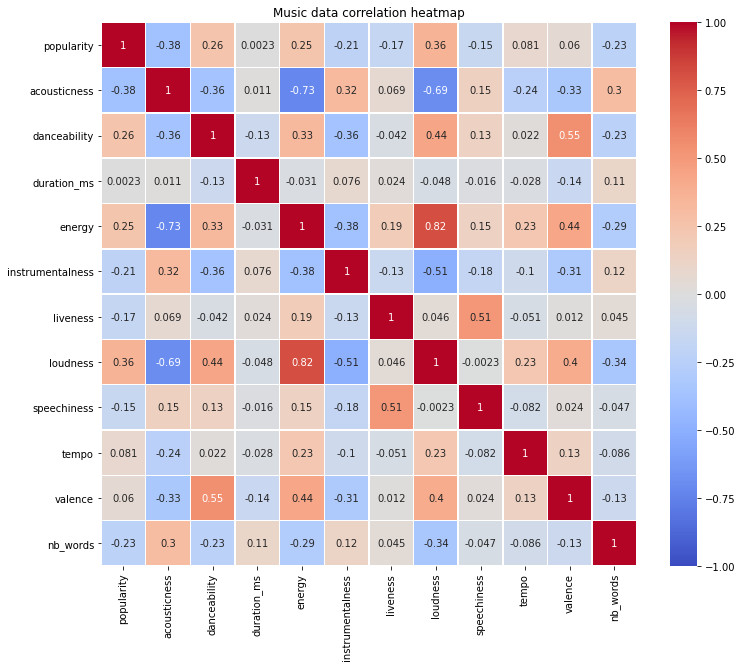

In [74]:
# Creating correlation matrix
corr = df_music.corr()

# Preparing figure
fig, ax = plt.subplots(figsize=(12,10))

# Creating correlation heatmap
ax = sns.heatmap(data=corr,
                 cmap="coolwarm",
                 center=0.0,
                 linewidths=.5,
                 vmin=-1,
                 vmax=1,
                 annot=True)

# Adding title
ax.set_title("Music data correlation heatmap")

fig.show()

Some columns seems to have a strong (negative) correlations. 
- Which ones?  
- What does it mean?

**Your answer here:**  
`energy` and `acousticness` have strong negative correlation.  
That means `energy` tend to be lower when `acousticness` is higher and vice versa.

## Find the correlation coefficient between Energy and Acousticness

In [77]:
# It is already computed, so ...
corr["energy"]["acousticness"]

-0.7255763647090392

## Pairplot
Only for genres Opera and Reggaeton, display a pairplot with different colors for genres (so you'll have 2 colors).

Looking at these pairplots - would you expect to be able to build a high accuracy classification model? (are the two classes easily separable from each other?)

In [78]:
sns.pairplot(data=df_music[df_music["genre"].isin(["Opera", "Reggaeton"])], hue="genre")

Output hidden; open in https://colab.research.google.com to view.

## Scatterplot
Draw a scatterplot on the columns of your choice:
- Include only genres Opera and Reggaeton
- Each genre has its own color
- Please choose beautiful colors, and remember to display a title.

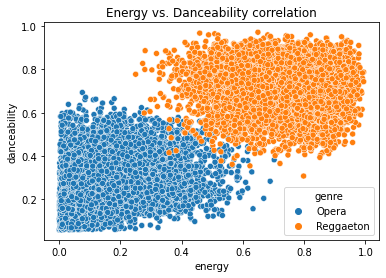

In [102]:
df_slice = df_music[df_music["genre"].isin(["Opera", "Reggaeton"])].copy()

df_slice

fig, ax = plt.subplots()

ax = sns.scatterplot(data=df_slice, x="energy", y="danceability", hue="genre")
ax.set_title("Energy vs. Danceability correlation")

fig.show()

## Boxplot
Draw on the same figure 2 boxplots : 1 by genre.
- Boxplots have to be in vertical
- Filter only on genres Opera and Reggaeton
- Your boxplots represent danceability

Your chart must be similar to this one (without the red arrow)

![boxplot](https://raw.githubusercontent.com/murpi/wilddata/master/checkpoint2_boxplot.png)

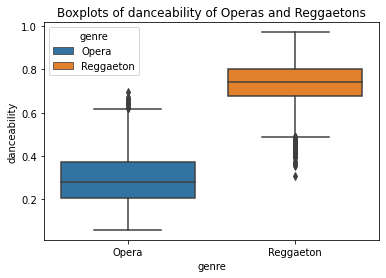

In [115]:
# Your code here:

df_slice = df_music.loc[df_music["genre"].isin(["Opera", "Reggaeton"]), ["genre", "energy", "danceability"]].copy()


fig, ax = plt.subplots()

ax = sns.boxplot(data=df_slice, x="genre", y="danceability", hue="genre", dodge=False, orient="v")
ax.set_title("Boxplots of danceability of Operas and Reggaetons")

fig.show()

How do we read it ?
- What does the horizontal line near the red arrow represent? What does it mean?

**Your answer here:**  
That line is 3rd Quartile. That means 75% of all measurements are below that point.

## Histogram
Draw a histogram for the distribution of "energy", only for the genre 'Country'

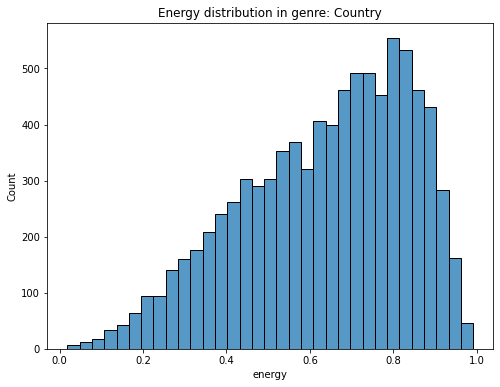

In [123]:
# TODO: display legend
fig, ax = plt.subplots(figsize=(8,6))
ax = sns.histplot(data=df_music[df_music["genre"]=="Country"], x="energy", legend=True)
ax.set_title("Energy distribution in genre: Country")
fig.show()

## (Bonus) Interactive chart
With plotly express, draw an interactive **histogram on energy**. 
- You'll add an animation frame on `genre`.
- Please be sure that the vertical scale is appropriate. Histograms should not "stick out" vertically, regardless of the `genre`.
- Don't forget the title.

In [144]:
# Your code here:


df_slice = df_music[["genre", "energy"]]

import plotly.express as px

fig = px.histogram(df_slice, x="energy", animation_frame="genre", nbins=50, range_y=[0,1200])

fig.update_layout(
    title_text="Energy Histogram",
    xaxis_title_text="Energy",
    yaxis_title_text="Count",
    bargap=0.2, # gap between bars of adjacent location coordinates
    bargroupgap=0.1 # gap between bars of the same location coordinates
)

fig.show()

Output hidden; open in https://colab.research.google.com to view.

# Machine Learning : Regression (approximately 1h)
In this part we will try to predict the **"loudness"** of a track. 

## Univariate regression
First we will train an **univariate linear regression** model.

Find the most correlated column with **loudness**.

In [150]:
# Second highest absolute correlation coefficient value = energy
corr["loudness"].abs().sort_values(ascending=False)[[1]]

energy    0.816088
Name: loudness, dtype: float64

Split your dataset into a train and test set (using 80% as train and 20% as test). 

Use a `random_state` of **1** (for reproductivity sake).

In [197]:
from sklearn.model_selection import train_test_split

X = np.array(df_music["energy"])
y = np.array(df_music["loudness"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


Now train your model on the train set.

In [198]:
from sklearn.linear_model import LinearRegression

LR_model = LinearRegression().fit(X_train.reshape(-1, 1), y_train)

LR_predict = LR_model.predict(X_test.reshape(-1, 1))

And evaluate it on the test set. If you did everything right your score should be `0.6689508695872618`.

In [199]:
LR_model.score(X_test.reshape(-1, 1), y_test)

0.6689508695872618

Visualize your data with a scatter plot (different colors for the train and the test set).

Add a lineplot of the regression.

You should get something like this. But of course, your graphic will have nicer colors, and a title!

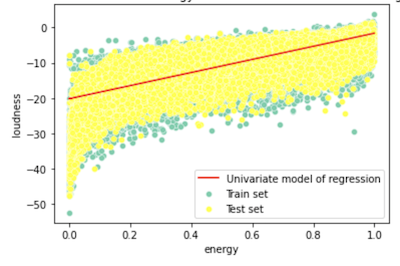

In [202]:
LR_model.coef_
LR_model.intercept_

-20.171580657530956

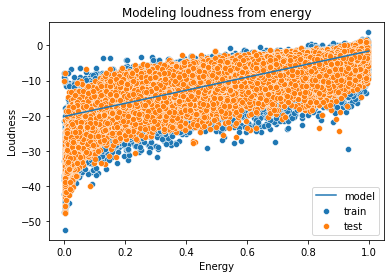

In [212]:
# Your code here:

fig, ax = plt.subplots()

ax = sns.scatterplot(x=X_train, y=y_train, label="train")
ax = sns.scatterplot(x=X_test, y=y_test, label="test")

x_sp = np.linspace(0,1)
y_line = x_sp * LR_model.coef_ + LR_model.intercept_

ax = sns.lineplot(x=x_sp, y=y_line, label="model")
ax.set_title("Modeling loudness from energy")
ax.set(xlabel="Energy", ylabel="Loudness")

plt.show()

Print the equation of the regression.

In [213]:
# Replace a and b by the coefficients you found
print(f"{LR_model.coef_} * x + {LR_model.intercept_}")

[18.56775242] * x + -20.171580657530956


Please predict the "**loudness**" for a an energy of 0.62

In [214]:
# Your code here:

def loudness(energy):
  return 18.56775242 * energy - 20.171580657530956

loudness(0.62) 

-8.659574157130956

## Multivariate regression

Now you will predict the **loudness** of a track with all the others numericals columns. 

You will do all the needed steps and keep a `random_state` of 1.

Your test score should be : `0.7650705916016727`. Is there overfitting?

In [226]:
#df_music.info()

X = np.array(df_music[["popularity",
                     "acousticness",
                     "danceability",
                     "duration_ms",
                     "energy",
                     "instrumentalness",
                     "liveness",
                     "speechiness",
                     "tempo",
                     "valence"]])

y = np.array(df_music[["loudness"]])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

MVLR_model = LinearRegression().fit(X_train, y_train)

MVLR_predict = MVLR_model.predict(X_test)

MVLR_model.score(X_test, y_test)

# score = 0.7650705916017241

# Honestly it seems like the score number is quite high, but I don't know how to
# tell whether it's actually overfitting.

# Also, there's small delta between the expected score and calculated model score:
# delta = 5.140332604014475e-14

# Can't explain it now.


0.7650705916017241

In [227]:
MVLR_model.score(X_test, y_test) - 0.7650705916016727

5.140332604014475e-14

# (Bonus 1) Machine Learning : Classification

In this part, you'll include only `Pop` and `Rap` genres.

Train a classification model that predict the genre of a track with wichever columns you want. You can try different algorithms.

Try to get the best accuracy score on your test set!!! (without overfitting)


Please display a confusion matrix

In [ ]:
# Your code here:

# (Bonus 2) Comparison between the top 1% popularity and the total dataset 
Find a way to compare songs with highest popularity and the others. Something like this example, but you could be creative.

Here we've compared the frequencies by genre (35% of top-songs are "pop", versus 4% of pop songs in the total dataset)




![comparison](https://raw.githubusercontent.com/murpi/wilddata/master/checkpoint2_comparison.png)

In [ ]:
# Your code here: